In [13]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.load("reshaped_14.npy")

In [14]:
hidden_nodes = 225
epochs = 1
lr = 1e-4
samples = 60000
input_size = 196
X = X_train.reshape(samples,input_size)
X = X/255.0
Lambda = 1
s = 0.1
# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def layer(x,W,b):
    return np.matmul(x,W)+b

W1 = np.random.normal(0,1,(input_size,hidden_nodes))
Bi1 = np.random.normal(0,1,(1,hidden_nodes))
W2 = np.random.normal(0,1,(hidden_nodes,input_size))
Bi2 = np.random.normal(0,1,(1,input_size))

In [15]:
epochs = 50
for i in range(epochs):
    loss = 0
    w1 = np.zeros(W1.shape)
    b1 = np.zeros(Bi1.shape)
    w2 = np.zeros(W2.shape)
    b2 = np.zeros(Bi2.shape)
    S  = np.zeros(W1.shape)
    #forward pass
    out1 = layer(X,W1,Bi1)
    z = sigm(out1)
    out2 = layer(z,W2,Bi2)
    y = sigm(out2)
    #BACKPROPAGATION
    del1 = 2*(y-X)*diff_sigm(out2)
    b2 = np.sum(del1, axis = 0).reshape(np.shape(Bi2))
    w2 = np.matmul(z.T,del1)
    zm = np.mean(z,axis = 0)
#     print(z.shape,zm.shape)
    ge = (Lambda)*(-s/zm + (1-s)/(1-zm))*diff_sigm(out1)
#     print(ge.shape)
    s1 = ge-(diff_sigm(out1)*np.matmul(del1,W2.T))
#     print(s1.shape, Bi1.shape,del1.shape, W2.shape,ge.shape)
    b1 = np.sum(s1,axis=0).reshape(np.shape(Bi1))
    w1 = np.matmul(X.T,s1)
    loss = np.sum(np.linalg.norm(y-X)**2)
    print(i,loss)
    W1 -= lr*w1
    W2 -= lr*w2
    Bi1 -= lr*b1
    Bi2 -= lr*b2

(0, 4959775.942707532)
(1, 3518283.1423144364)
(2, 2212659.7419363274)
(3, 1821387.3795106306)
(4, 1717910.0238258706)
(5, 1329375.2192145516)
(6, 1181078.816165203)
(7, 1073796.5874516352)
(8, 1019193.5392536339)
(9, 978479.4837130362)
(10, 951528.1658912407)
(11, 929369.5410260829)
(12, 909541.167883895)
(13, 891781.6672395752)
(14, 876472.52291566)
(15, 863247.7214360026)
(16, 851603.9669210775)
(17, 841091.9129762937)
(18, 831406.987588887)
(19, 822347.5323840735)
(20, 813771.2185442543)
(21, 805560.7316446652)
(22, 797624.181144698)
(23, 789902.6949412033)
(24, 782382.0363015814)
(25, 775098.8061149159)
(26, 768110.3094841089)
(27, 761447.8343140234)
(28, 755108.0630944659)
(29, 749067.4038865605)
(30, 743297.2141865438)
(31, 737770.4973342613)
(32, 732461.5808086268)
(33, 727343.3351173658)
(34, 722384.2771576757)
(35, 717549.6161797618)
(36, 712808.0803438338)
(37, 708134.8428005684)
(38, 703506.111104267)
(39, 698897.499219264)
(40, 694288.8384291412)
(41, 689666.996362607)
(42

In [16]:
out1 = layer(X,W1,Bi1)
z = sigm(out1)
out2 = layer(z,W2,Bi2)
y = sigm(out2)
y = y*255.0

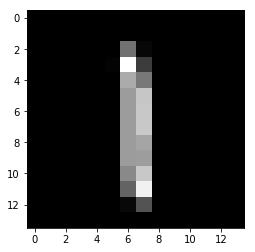

In [17]:
plt.imshow(X[14].reshape(14,14) , cmap='gray')

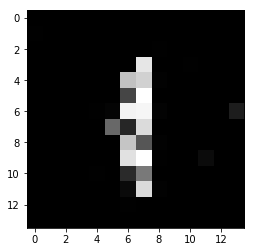

In [18]:
plt.imshow(y[14].reshape(14,14) , cmap='gray' )

In [19]:
count = 0
for i in range(len(z[1])):
    if(z[1][i] > 0.01):
        count += 1
print(count,len(z[1]))

print(np.mean(z[1]))


(70, 225)
0.11057718354333364
